# Flights in the United States Data Exploration

## Preliminary Wrangling

This document explores a dataset containing information of over 7,000,000 flights in the United States, including carriers, arrival, and departure delays, and reasons for delays in 2008.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

In [2]:
# Load in datasets into a pandas dataframe
flights = pd.read_csv('2008.csv')

In [3]:
# High-level overview of data shape and composition
print(flights.shape)
print(flights.dtypes)
print(flights.head(10))

(7009728, 29)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object
   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   2003.0        1955  

In [4]:
# Print statistics for numeric variables
print (flights.describe())

            Year         Month    DayofMonth     DayOfWeek       DepTime  \
count  7009728.0  7.009728e+06  7.009728e+06  7.009728e+06  6.873482e+06   
mean      2008.0  6.375130e+00  1.572801e+01  3.924182e+00  1.333830e+03   
std          0.0  3.406737e+00  8.797068e+00  1.988259e+00  4.780689e+02   
min       2008.0  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%       2008.0  3.000000e+00  8.000000e+00  2.000000e+00  9.280000e+02   
50%       2008.0  6.000000e+00  1.600000e+01  4.000000e+00  1.325000e+03   
75%       2008.0  9.000000e+00  2.300000e+01  6.000000e+00  1.728000e+03   
max       2008.0  1.200000e+01  3.100000e+01  7.000000e+00  2.400000e+03   

         CRSDepTime       ArrTime    CRSArrTime     FlightNum  \
count  7.009728e+06  6.858079e+06  7.009728e+06  7.009728e+06   
mean   1.326086e+03  1.481258e+03  1.494801e+03  2.224200e+03   
std    4.642509e+02  5.052251e+02  4.826728e+02  1.961716e+03   
min    0.000000e+00  1.000000e+00  0.000000e+00  1.0000

### Structure of dataset

There are 7,009,728 flights in the dataset with a total of 29 columns.  Some of the columns of interest include:
 - UniqueCarrier which identifies the airline
 - Origin and Dest which includes the airport code which can be used to identify the appropriate airport for scheduled departure and landing
 - Cancelled and CancellationCode to determine whether the flight was cancelled and the reason for cancellation
 - CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay which can be used to determine the reason and length of a flight's delay
 - Month, DayofMonth, DayOfWeek to determine the day of the flight


### Main features of interest in dataset

I`m most interested in figuring out whether there are specific airlines that tend to have more delays than others and also  whether the day of the week has en effect on flight delays.  Other points of interest may include factors or reasons for the delay.

## Clean Data

In [5]:
# Load in carriers and airports data sets into pandas dataframes
airports = pd.read_csv('airports.csv')
carriers = pd.read_csv('carriers.csv')

In [6]:
airports.head(3)

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893


In [7]:
carriers.head(3)

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"


In [8]:
# Merge airports dataframe into flights dataframe on 'iata' and 'Origin'
flights = pd.merge(flights, airports, left_on = 'Origin', right_on = 'iata', how = 'left')

In [9]:
print(flights.columns)

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'iata', 'airport', 'city', 'state', 'country', 'lat', 'long'],
      dtype='object')


In [10]:
# Rename the 'airport', 'city', 'state', 'country' columns to represent Origin flight
flights.rename(columns = {'airport':'airport_origin', 'city':'city_origin', 'state':'state_origin','country':'country_origin'}
              , inplace = True)

In [11]:
# Merge airports dataframe into flights dataframe on 'iata' and 'Dest'
flights = pd.merge(flights, airports, left_on = 'Dest', right_on = 'iata', how = 'left')

In [12]:
# Rename the 'airport', 'city', 'state', 'country' columns to represent Destination of flight
flights.rename(columns = {'airport':'airport_dest', 'city':'city_dest', 'state':'state_dest','country':'country_dest'}
              , inplace = True)

In [13]:
# Drop some unnecessary columns (I was having memory problems without doing this earlier in cleaning)
columns = ['DepTime','ArrTime','CRSArrTime','FlightNum','TailNum','ActualElapsedTime','CRSElapsedTime','AirTime','Origin',
          'Distance','TaxiIn','TaxiOut','iata_x','lat_x','long_x','iata_y','lat_y','long_y', 'Dest']
flights.drop(columns, inplace=True, axis=1)

In [14]:
# Merge carriers dataframe into flights dataframe on 'Code' and 'UniqueCarrier'
flights = pd.merge(flights, carriers, left_on = 'UniqueCarrier', right_on = 'Code', how = 'left')

In [15]:
# Change Description column to Airline
flights.rename(columns = {'Description' : 'Airline'}, inplace = True)

In [16]:
flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime',
       'UniqueCarrier', 'ArrDelay', 'DepDelay', 'Cancelled',
       'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'airport_origin',
       'city_origin', 'state_origin', 'country_origin', 'airport_dest',
       'city_dest', 'state_dest', 'country_dest', 'Code', 'Airline'],
      dtype='object')

In [17]:
# Drop some unnecessary columns 
columns1 = ['UniqueCarrier','Code']
flights.drop(columns1, inplace=True, axis=1)

In [18]:
flights.head(5)

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,ArrDelay,DepDelay,Cancelled,CancellationCode,Diverted,...,LateAircraftDelay,airport_origin,city_origin,state_origin,country_origin,airport_dest,city_dest,state_dest,country_dest,Airline
0,2008,1,3,4,1955,-14.0,8.0,0,NaN,0,...,NaN,Washington Dulles International,Chantilly,VA,USA,Tampa International,Tampa,FL,USA,Southwest Airlines Co.
1,2008,1,3,4,735,2.0,19.0,0,NaN,0,...,NaN,Washington Dulles International,Chantilly,VA,USA,Tampa International,Tampa,FL,USA,Southwest Airlines Co.
2,2008,1,3,4,620,14.0,8.0,0,NaN,0,...,NaN,Indianapolis International,Indianapolis,IN,USA,Baltimore-Washington International,Baltimore,MD,USA,Southwest Airlines Co.
3,2008,1,3,4,930,-6.0,-4.0,0,NaN,0,...,NaN,Indianapolis International,Indianapolis,IN,USA,Baltimore-Washington International,Baltimore,MD,USA,Southwest Airlines Co.
4,2008,1,3,4,1755,34.0,34.0,0,NaN,0,...,32.0,Indianapolis International,Indianapolis,IN,USA,Baltimore-Washington International,Baltimore,MD,USA,Southwest Airlines Co.


In [19]:
# Change name of DayofMonth column to Day for datetime
flights.rename(columns = {'DayofMonth':'Day'}, inplace = True)

In [20]:
# Combine Year, Month, Day into one Date column
flights['Date'] = pd.to_datetime(flights[['Year','Month','Day']])

In [21]:
# Drop Year, Month, Day columns
columns2 = ['Year','Month','Day','DayOfWeek']
flights.drop(columns2, axis = 1, inplace = True)

In [22]:
# Get day of the week using datetime from Date column
flights['Weekday'] = flights[['Date']].apply(lambda x: dt.datetime.strftime(x['Date'], '%A'), axis = 1)

In [23]:
flights.columns

Index(['CRSDepTime', 'ArrDelay', 'DepDelay', 'Cancelled', 'CancellationCode',
       'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'airport_origin', 'city_origin', 'state_origin',
       'country_origin', 'airport_dest', 'city_dest', 'state_dest',
       'country_dest', 'Airline', 'Date', 'Weekday'],
      dtype='object')

In [24]:
print(flights.head(5))

   CRSDepTime  ArrDelay  DepDelay  Cancelled CancellationCode  Diverted  \
0        1955     -14.0       8.0          0              NaN         0   
1         735       2.0      19.0          0              NaN         0   
2         620      14.0       8.0          0              NaN         0   
3         930      -6.0      -4.0          0              NaN         0   
4        1755      34.0      34.0          0              NaN         0   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay    ...     \
0           NaN           NaN       NaN            NaN    ...      
1           NaN           NaN       NaN            NaN    ...      
2           NaN           NaN       NaN            NaN    ...      
3           NaN           NaN       NaN            NaN    ...      
4           2.0           0.0       0.0            0.0    ...      

    city_origin state_origin country_origin  \
0     Chantilly           VA            USA   
1     Chantilly           VA            USA   

### Structure of data set after data cleaning

 - CRSDepTime:  Scheduled departure time
 - ArrDelay, DepDelay: Arrival and Departure delay (in minutes)
 - Cancelled: Was flight cancelled? (0-No, 1-Yes)
 - CancellationCode: Reason for cancellation (A-Carrier, B-Weather, C-NAS, D-Security)
 - Diverted: Was flight diverted? (0-No, 1-Yes)
 - CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay: Delay (in minutes)
 - airport_origin, city_origin, state_origin, country_origin: Flight's origin airport and location information
 - airport_dest, city_dest, state_dest, country_dest:  Flight's destination airport and location information
 - Airline: Flight's airline name
 - Date: Date of flight
 - Weekday: Day of the week of the flight

## Data Exploration

I'll start by looking at the distribution of the main vairable of interest: DepDelay which is the number of minutes which a plane was delayed for departure.  Negative numbers in this column represent a flight that left earlier than its scheduled departure time.

In [25]:
# Remove text in parenthesis for US Airways Inc.
flights['Airline'] = flights['Airline'].str.replace("(Merged with America West 9/05. Reporting for both starting 10/07.)","")

In [26]:
flights['Airline'] = flights['Airline'].map(lambda x: str(x)[:-2])

In [27]:
print(flights.Airline.unique())

['Southwest Airlines C' 'Expressjet Airlines In' 'Mesa Airlines In'
 'Comair In' 'Skywest Airlines In' 'United Air Lines In'
 'US Airways Inc. ' 'Delta Air Lines In' 'Atlantic Southeast Airlin'
 'Frontier Airlines In' 'AirTran Airways Corporati' 'Hawaiian Airlines In'
 'American Eagle Airlines In' 'Northwest Airlines In'
 'Pinnacle Airlines In' 'American Airlines In' 'Aloha Airlines In'
 'Alaska Airlines In' 'JetBlue Airwa' 'Continental Air Lines In']


In [28]:
# Remove any rows where DepDelay is Null
flights_delay = flights[flights['DepDelay'].notnull()]

In [29]:
# Check if there are any Null values in DepDelay
flights_delay.DepDelay.isnull().value_counts()

False    6873482
Name: DepDelay, dtype: int64

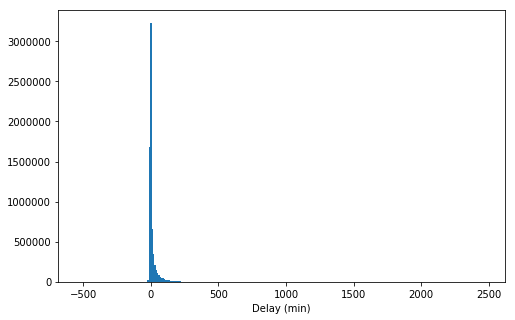

In [30]:
# Start with a standard-scale plot
bins = np.arange(flights_delay['DepDelay'].min(), flights_delay['DepDelay'].max()+5, 10)

plt.figure(figsize=[8,5])
plt.hist(data = flights, x = 'DepDelay', bins = bins)
plt.xlabel('Delay (min)')
plt.show()

In [31]:
print(flights_delay.DepDelay.sort_values())
print(flights_delay.DepDelay.sort_values(ascending = False))

5179806    -534.0
146340      -92.0
1109253     -79.0
2507726     -71.0
1728819     -70.0
4383356     -70.0
1345254     -70.0
1347397     -67.0
133642      -65.0
4715599     -64.0
4365965     -64.0
744394      -63.0
1540631     -62.0
148306      -62.0
743070      -62.0
3821249     -61.0
129621      -61.0
141123      -61.0
1104064     -61.0
2721518     -61.0
173325      -61.0
3130154     -61.0
5138741     -60.0
5895717     -60.0
526486      -59.0
733072      -58.0
136699      -57.0
1360254     -56.0
4732928     -56.0
4378529     -56.0
            ...  
3432027    1287.0
2818284    1292.0
2171121    1295.0
4757792    1300.0
5039477    1303.0
2226951    1311.0
1097934    1316.0
4099781    1316.0
4117650    1337.0
1006701    1348.0
5784207    1351.0
503727     1355.0
996512     1357.0
3435921    1358.0
4675223    1367.0
5524147    1369.0
5238318    1395.0
2234143    1401.0
6868167    1403.0
6842014    1428.0
1634129    1490.0
4061361    1518.0
1705852    1521.0
2232494    1545.0
5232546   

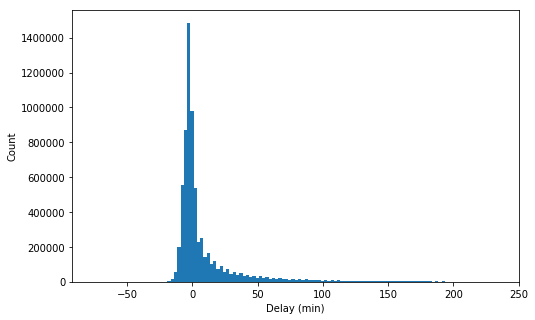

In [32]:
# original plot
bins = np.arange(flights_delay['DepDelay'].min(), flights_delay['DepDelay'].max()+5, 2.5)

plt.figure(figsize=[8,5])
plt.xlim(-92, 250)
plt.hist(data = flights_delay, x = 'DepDelay', bins = bins)
plt.xlabel('Delay (min)')
plt.ylabel('Count')
plt.show()

It appears that most of the flights have none to little delay time.  The graph is skewed to the right with some flights having a very long delay.  Also, there are a number of flights that left a little early.

In [33]:
np.log10(flights_delay.DepDelay.describe())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


count    6.837177
mean     0.998807
std      1.547913
min           NaN
25%           NaN
50%           NaN
75%      0.903090
max      3.392169
Name: DepDelay, dtype: float64

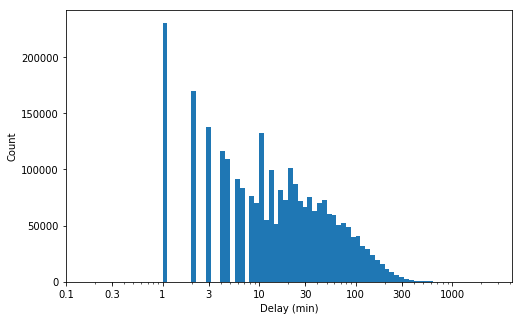

In [34]:
#There is a long tail distribution, so I am going to put it on a log scale instead
# original plot
bins = 10 ** np.arange(0, 3.392169+.1, .05)

plt.figure(figsize=[8,5])
plt.hist(data = flights_delay, x = 'DepDelay', bins = bins)
plt.xscale('log')
plt.xlabel('Delay (min)')
plt.ylabel('Count')
ticks =[.1,.3,1,3,10,30,100, 300, 1000]
plt.xticks(ticks, ticks)
plt.show() 

We can see a better distribution of delay times

In [35]:
pd.options.display.max_columns = None
display(flights_delay)

,CRSDepTime,ArrDelay,DepDelay,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,airport_origin,city_origin,state_origin,country_origin,airport_dest,city_dest,state_dest,country_dest,Airline,Date,Weekday
0,1955,-14.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Washington Dulles International,Chantilly,VA,USA,Tampa International,Tampa,FL,USA,Southwest Airlines C,2008-01-03,Thursday
1,735,2.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Washington Dulles International,Chantilly,VA,USA,Tampa International,Tampa,FL,USA,Southwest Airlines C,2008-01-03,Thursday
2,620,14.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Indianapolis International,Indianapolis,IN,USA,Baltimore-Washington International,Baltimore,MD,USA,Southwest Airlines C,2008-01-03,Thursday
3,930,-6.0,-4.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Indianapolis International,Indianapolis,IN,USA,Baltimore-Washington International,Baltimore,MD,USA,Southwest Airlines C,2008-01-03,Thursday
4,1755,34.0,34.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0,Indianapolis International,Indianapolis,IN,USA,Baltimore-Washington International,Baltimore,MD,USA,Southwest Airlines C,2008-01-03,Thursday
5,1915,11.0,25.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Indianapolis International,Indianapolis,IN,USA,Jacksonville International,Jacksonville,FL,USA,Southwest Airlines C,2008-01-03,Thursday
6,1830,57.0,67.0,0,NaN,0,10.0,0.0,0.0,0.0,47.0,Indianapolis International,Indianapolis,IN,USA,McCarran International,Las Vegas,NV,USA,Southwest Airlines C,2008-01-03,Thursday
7,1040,-18.0,-1.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Indianapolis International,Indianapolis,IN,USA,McCarran International,Las Vegas,NV,USA,Southwest Airlines C,2008-01-03,Thursday
8,615,2.0,2.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Indianapolis International,Indianapolis,IN,USA,Kansas City International,Kansas City,MO,USA,Southwest Airlines C,2008-01-03,Thursday
9,1620,-16.0,0.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Indianapolis International,Indianapolis,IN,USA,Kansas City International,Kansas City,MO,USA,Southwest Airlines C,2008-01-03,Thursday


In [36]:
print(flights.Airline.unique())
print(flights.Airline.nunique())

['Southwest Airlines C' 'Expressjet Airlines In' 'Mesa Airlines In'
 'Comair In' 'Skywest Airlines In' 'United Air Lines In'
 'US Airways Inc. ' 'Delta Air Lines In' 'Atlantic Southeast Airlin'
 'Frontier Airlines In' 'AirTran Airways Corporati' 'Hawaiian Airlines In'
 'American Eagle Airlines In' 'Northwest Airlines In'
 'Pinnacle Airlines In' 'American Airlines In' 'Aloha Airlines In'
 'Alaska Airlines In' 'JetBlue Airwa' 'Continental Air Lines In']
20


There are a total of 20 airlines in this data set

In [37]:
# Seperate only flights that are delayed
flights_delay2 = flights_delay.query('DepDelay > 0')

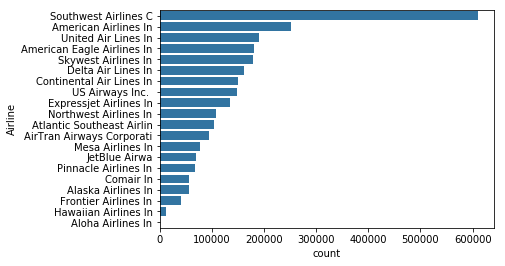

In [38]:
#Create a bar plot showing the number of delayed flight per Airline
base_color = sb.color_palette()[0]
count_order = flights_delay2['Airline'].value_counts().index
sb.countplot(data = flights_delay2, y = 'Airline', color = base_color, order = count_order)

Southwest Airline has significantly more delayed flights than any other airline.  However, this could be as a result of Southwest having the most flights. 

Text(0.5, 0, 'Delay(m)')

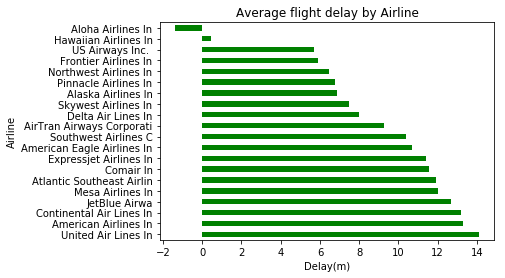

In [39]:
flights_delayavg = flights_delay.groupby('Airline')['DepDelay'].mean()
order = flights_delayavg.sort_values(ascending=False).index
flights_delayavg.sort_values(ascending=False).plot(kind='barh', color = 'green', title ='Average flight delay by Airline')
plt.xlabel('Delay(m)')

Plotted by average flight delay time, United Airlines has the longest delays on average.  This plot also takes into consideration on time flights or flights that have left early.  Southwest airlines which has the most delayed flights is in the middle of the pack for average flight delay time.

In [40]:
numeric_vars = ['DepDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
categoric_vars = ['Airline','airport_origin','Weekday']

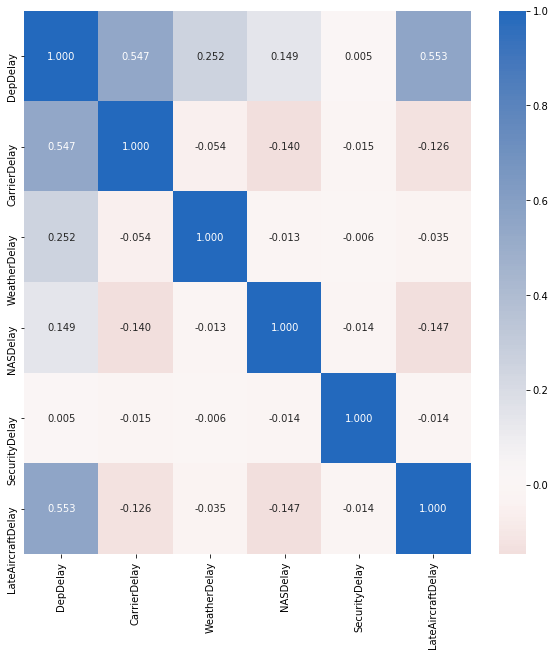

In [41]:
# correlation plot
plt.figure(figsize = [10, 10])
sb.heatmap(flights[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


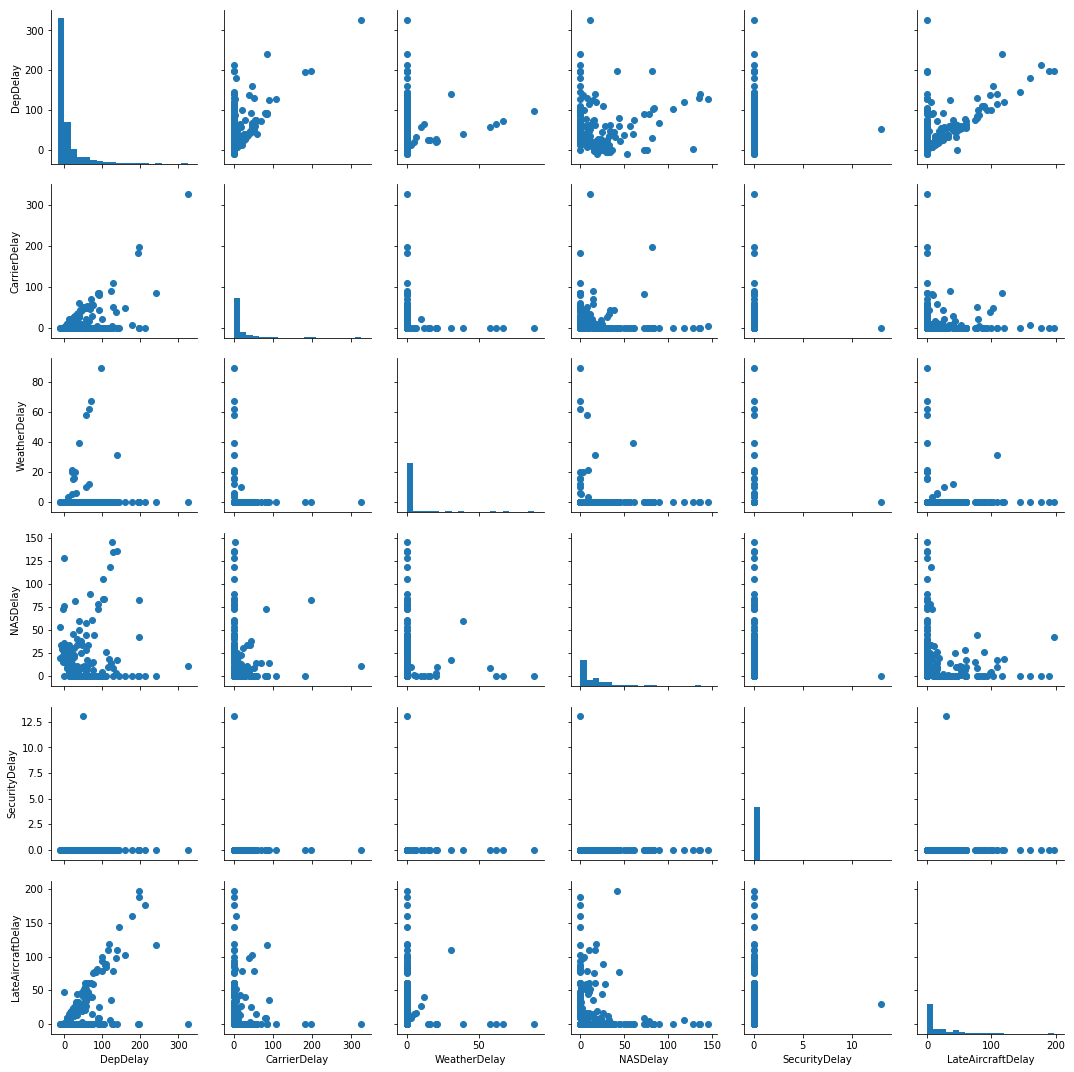

In [42]:
### plot matrix; sampled 1000 flights so plots are clearer and render faster
samples = np.random.choice(flights.shape[0], 1000, replace = False)
flights_samp = flights.loc[samples,:]
g = sb.PairGrid(data = flights_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

There seems to be a correlation between the Departure Delay and Carrier Delay and Late Aircraft Delay.

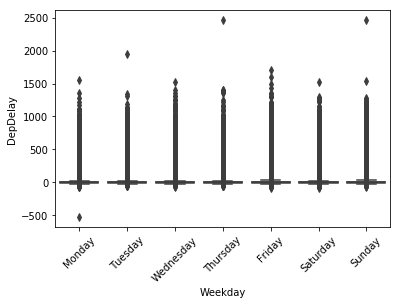

In [43]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'];
sb.boxplot(data = flights, x='Weekday', y='DepDelay', order = day_order);
plt.xticks(rotation = 45);

It appears Friday has the longest average departure delays.  This graph is not very informative though.

Text(0.5, 0, 'Delay(m)')

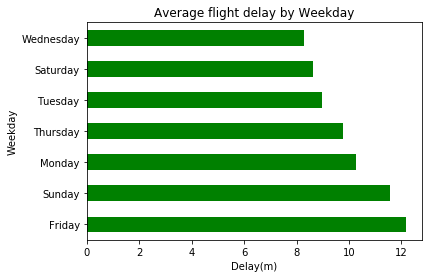

In [44]:
flights_daydelay = flights_delay.groupby('Weekday')['DepDelay'].mean()
order = flights_daydelay.sort_values(ascending=False).index
flights_daydelay.sort_values(ascending=False).plot(kind='barh', color = 'green', title ='Average flight delay by Weekday')
plt.xlabel('Delay(m)')

Text(0.5, 0, 'number of delays')

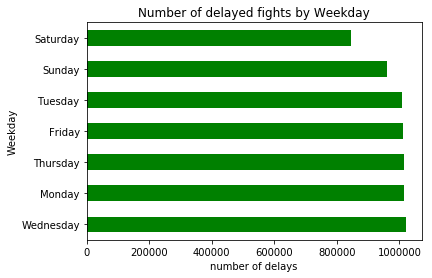

In [45]:
flights_daydelay = flights_delay.groupby('Weekday')['DepDelay'].count()
order = flights_daydelay.sort_values(ascending=False).index
flights_daydelay.sort_values(ascending=False).plot(kind='barh', color = 'green', title ='Number of delayed fights by Weekday')
plt.xlabel('number of delays')

In [46]:
flights_daydelay

Weekday
Friday       1011381
Monday       1015833
Saturday      844112
Sunday        958906
Thursday     1014470
Tuesday      1009095
Wednesday    1019685
Name: DepDelay, dtype: int64

The number of delayed flights for each day of the week is close except Saturday and Sunday which are a little less

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


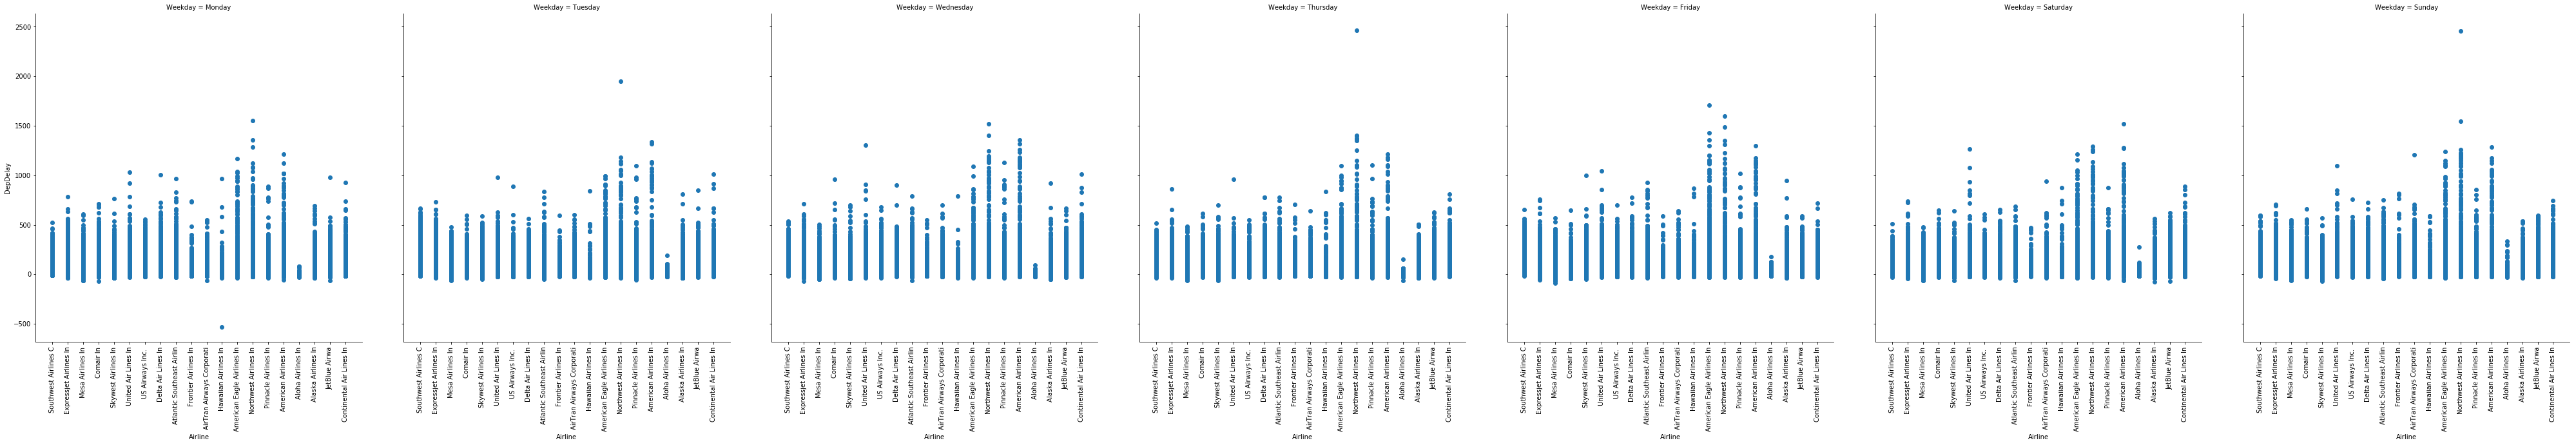

In [47]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
g=sb.FacetGrid(data = flights, col = 'Weekday', size = 8, 
               col_order = weekday_order)
g.map(plt.scatter, 'Airline', 'DepDelay')
g.set_xticklabels(rotation=90)

This scatter plot shows me which airlines on each day of the week tend to have the longest Departure Delays in single instances, however, I would like to know the average Departure Delay which will provide more useful information with regards to airlines that have more scheduled flights on a given day.

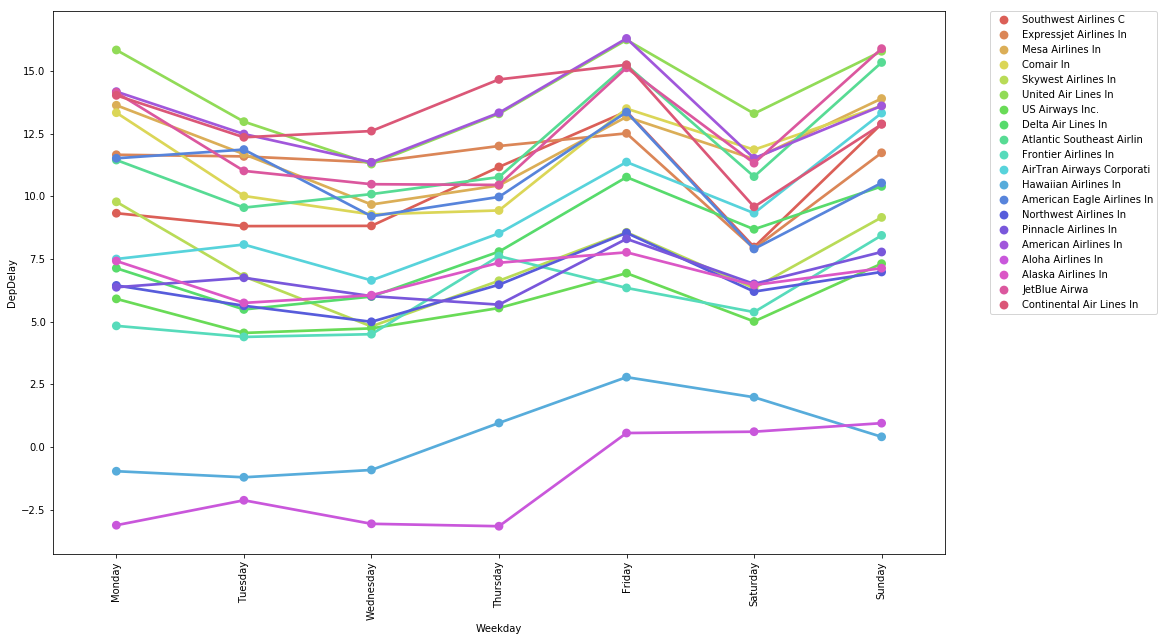

In [48]:
sb.set_palette(sb.color_palette("hls", 20))
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sb.pointplot(data = flights, x = 'Weekday', y= 'DepDelay', hue = 'Airline', linestyles = "-", order = weekday_order, ci = None)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The sheer number of airline depicted in the graph makes it difficult to gain knowledge so going forward I will be analyzing the top 5 airlines based on number of flights.

In [49]:
#Finding the top 5 airlines
flights.groupby(['Airline']).size()

Airline
AirTran Airways Corporati      261684
Alaska Airlines In             151102
Aloha Airlines In                7800
American Airlines In           604885
American Eagle Airlines In     490693
Atlantic Southeast Airlin      280575
Comair In                      197607
Continental Air Lines In       298455
Delta Air Lines In             451931
Expressjet Airlines In         374510
Frontier Airlines In            95762
Hawaiian Airlines In            61826
JetBlue Airwa                  196091
Mesa Airlines In               254930
Northwest Airlines In          347652
Pinnacle Airlines In           262208
Skywest Airlines In            567159
Southwest Airlines C          1201754
US Airways Inc.                453589
United Air Lines In            449515
dtype: int64

It appears Southwest Airlines C, American Airlines In, Skywest Airlines C, American Eagle Airlines In, and US Airways Inc. flew the most flights in 2008.

In [50]:
#Query results of top 5 airlines and add to dataframe 'top_airlines'
top_airlines = flights.query('Airline == "Southwest Airlines C" | Airline == "US Airways Inc. " | Airline == "Skywest Airlines In" | Airline == "American Airlines In" | Airline == "American Eagle Airlines In"')

In [51]:
#Check to see if all 5 airlines were added
top_airlines.Airline.unique()

array(['Southwest Airlines C', 'Skywest Airlines In', 'US Airways Inc. ',
       'American Eagle Airlines In', 'American Airlines In'], dtype=object)

This plot is telling of a few things.  First of all, Mondays, Fridays and Sundays appear to be the worst day to travel in terms of expecting delays.  The best day to travel on average would be Tuesday, Wednesday or Saturday with US Airways Inc. being the most reliable in terms of average departure delay.

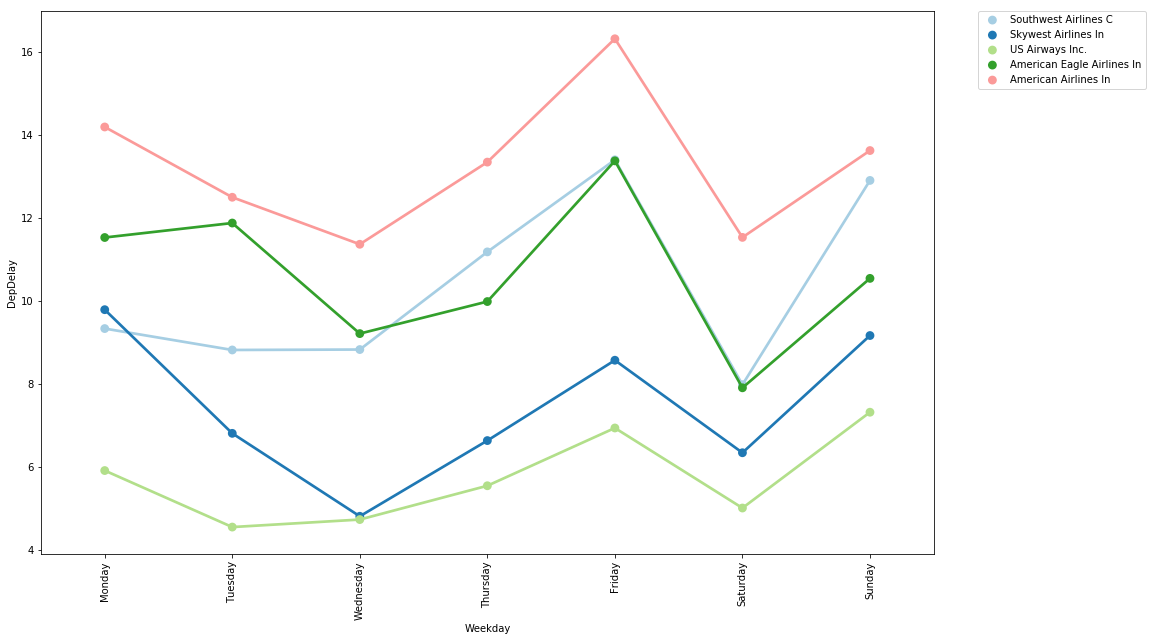

In [52]:
sb.set_palette(sb.color_palette("Paired", 5))
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sb.pointplot(data = top_airlines, x = 'Weekday', y= 'DepDelay', hue = 'Airline', linestyles = "-", order = weekday_order,
            ci = None)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

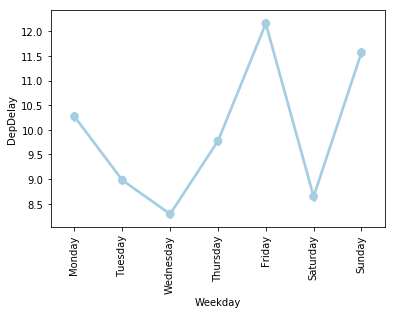

In [53]:
sb.pointplot(data = flights, x = 'Weekday', y= 'DepDelay', linestyles = "-", order = weekday_order)
plt.xticks(rotation = 90)

Taking the average of all flights in the database, Wednesday is the best day of the week to fly and then followed by Saturday.  Friday and Sunday are the worst days to fly.

I want to see the relationship of the Departure Delay with the hour of scheduled departure

In [54]:
#Convert CRSDepTime to String then splice off minutes to get hour of scheduled flight
flights['CRSDepTime'] = flights['CRSDepTime'].astype(str)
flights.CRSDepTime = flights.CRSDepTime.str[:-2]

In [55]:
#Drop rows that have a null value
flights = flights[flights['CRSDepTime'].notnull()]

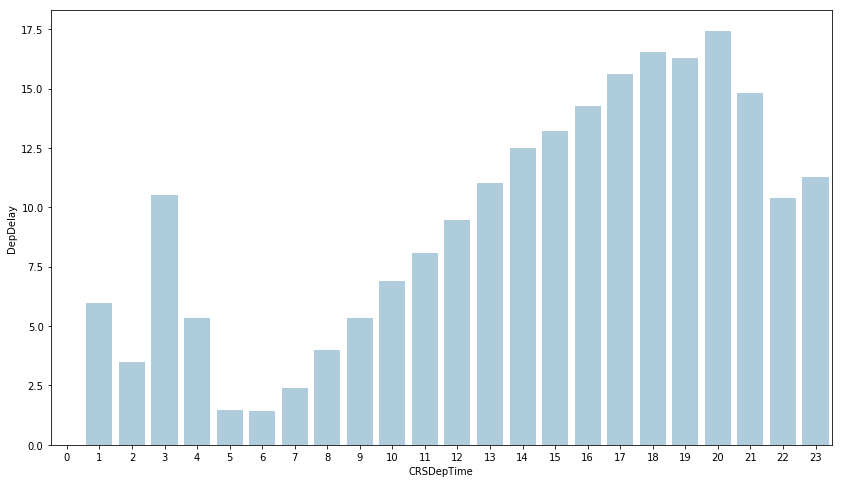

In [56]:
hour_order = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14',
             '15','16','17','18','19','20','21','22','23']
fig = plt.gcf()
fig.set_size_inches(14, 8)
base_color = sb.color_palette()[0]
sb.barplot(data = flights, x = 'CRSDepTime', y= 'DepDelay', color = base_color, order = hour_order, ci=None)

From the plot above it appears that the average departure delay increases the later it gets in the day with the worst average delay being at 8 pm.  

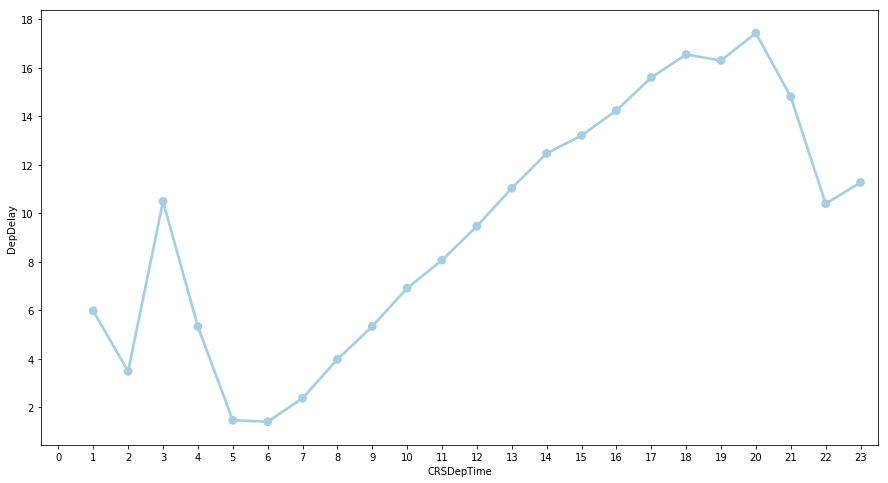

In [57]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sb.pointplot(data = flights, x = 'CRSDepTime', y= 'DepDelay', linestyles = "-", order = hour_order, ci=None)

In [58]:
#Convert CRSDepTime to String then splice off minutes to get hour of scheduled flight for the top_airlines dataframe
top_airlines['CRSDepTime'] = top_airlines['CRSDepTime'].astype(str)
top_airlines.CRSDepTime = top_airlines.CRSDepTime.str[:-2]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [59]:
#Drop rows that have a null value
top_airlines = top_airlines[top_airlines['CRSDepTime'].notnull()]

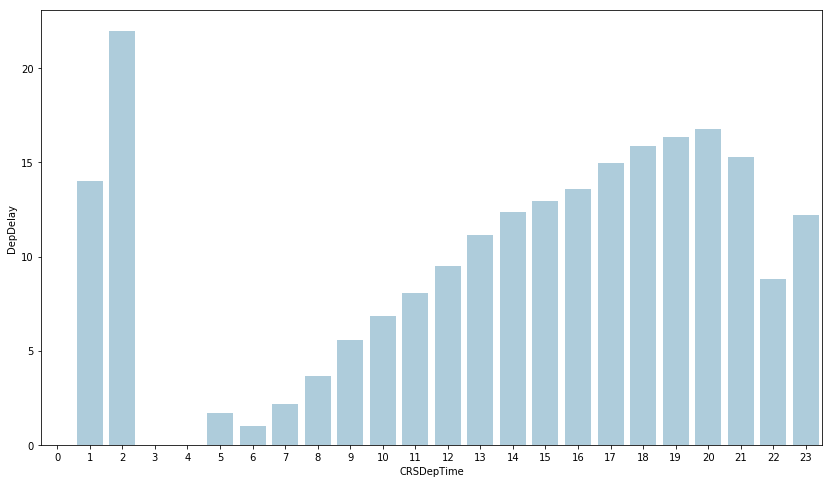

In [60]:
fig = plt.gcf()
fig.set_size_inches(14, 8)
base_color = sb.color_palette()[0]
sb.barplot(data = top_airlines, x = 'CRSDepTime', y= 'DepDelay', color = base_color, order = hour_order, ci=None)

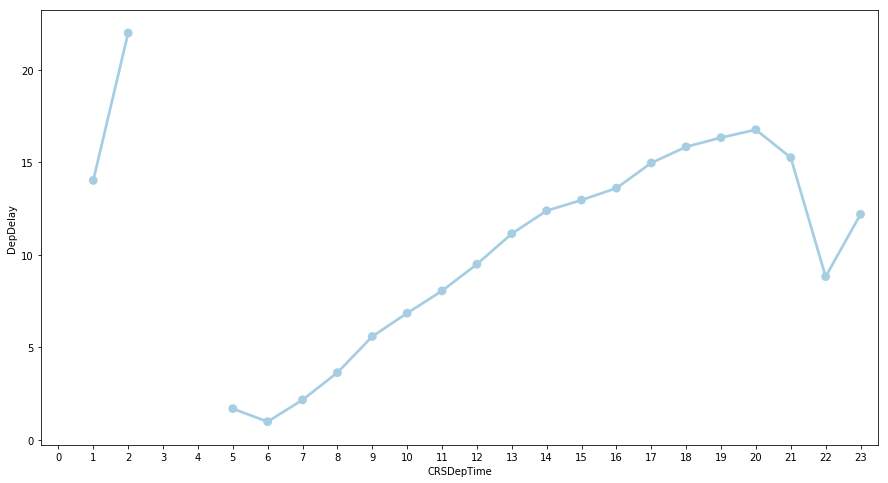

In [61]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sb.pointplot(data = top_airlines, x = 'CRSDepTime', y= 'DepDelay', linestyles = "-", order = hour_order, ci=None)

Text(0.5, 1.0, 'Average Departure Delay for all flights for each scheduled hour of flight')

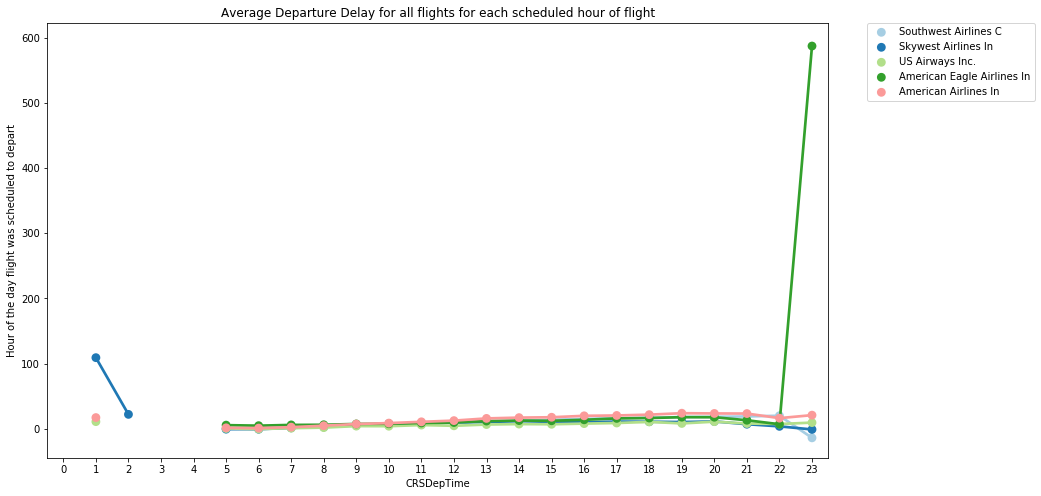

In [62]:
fig = plt.gcf()
fig.set_size_inches(14, 8)
sb.set_palette(sb.color_palette("Paired", 5))
sb.pointplot(data = top_airlines, x = 'CRSDepTime', y= 'DepDelay', order = hour_order, hue='Airline', ci=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Average Departure Delay (min)')
plt.ylabel('Hour of the day flight was scheduled to depart')
plt.title('Average Departure Delay for all flights for each scheduled hour of flight')

In [63]:
#Write cleaned dataframes to csv for explanatory analysis jupyter notebook
top_airlines.to_csv('top_airlines.csv')
flights_delay.to_csv('flights_delay.csv')
flights.to_csv('flights.csv')